# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

# MISSION 1 : Regression Trees

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [4]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
# EXERCICE 1
# INSERT CODE HERE
data = data.dropna()
data = data.drop(columns=['name'])

data['origin'] = data['origin'].map({'usa': 0, 'japon': 1, 'europe': 2})
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,0.0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,2.0
395,32.0,4,135.0,84.0,2295,11.6,82,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,0.0


# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [6]:
# Exercice 2
# INSERT CODE HERE

X = data['mpg']
y = data['mpg']

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les ensembles d'entraînement et de test
print("Ensemble d'entraînement X:\n", X_train)
print("\nEnsemble de test X:\n", X_test)
print("\nEnsemble d'entraînement y:\n", y_train)
print("\nEnsemble de test y:\n", y_test)

Ensemble d'entraînement X:
 260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

Ensemble de test X:
 79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
366    17.6
83     28.0
115    15.0
3      16.0
18     27.0
Name: mpg, Length: 79, dtype: float64

Ensemble d'entraînement y:
 260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

Ensemble de test y:
 79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
366    17.6
83     28.0
115    15.0
3      16.0
18     27.0
Name: mpg, Length: 79, dtype: float64


# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

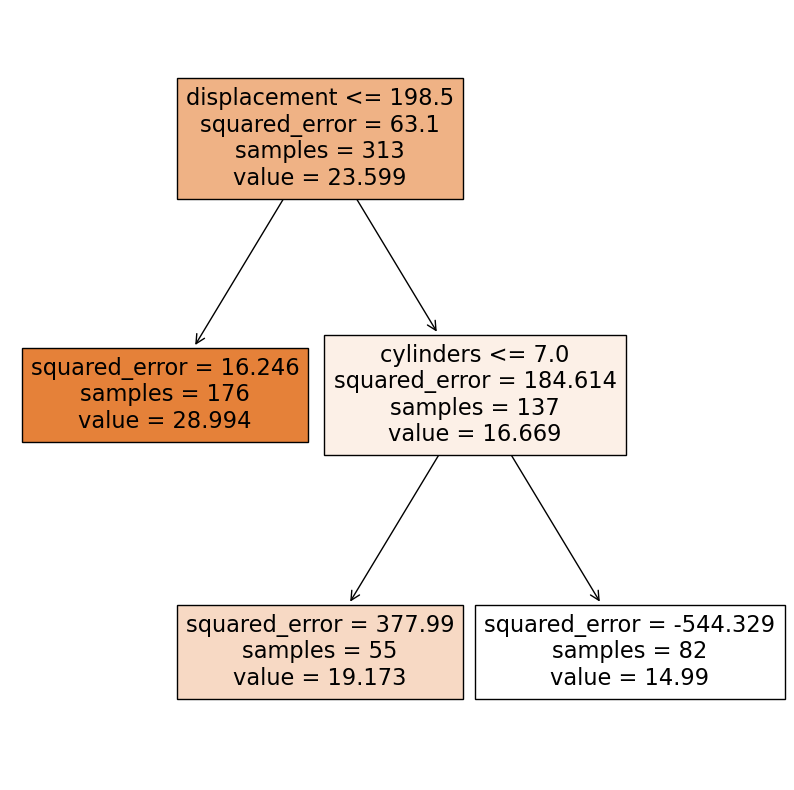

In [7]:
# Exercice 3
# INSERT CODE HERE
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = data.drop('mpg', axis=1)
y = data['mpg']

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisez et entraînez le modèle d'arbre de décision en régression
regression_tree = DecisionTreeRegressor()
regression_tree.fit(X_train, y_train)

plt.figure(figsize=(10, 10))
plot_tree(regression_tree, filled=True, feature_names=X.columns.tolist())
plt.show()



# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [8]:
# Exercice 4
# INSERT CODE HERE
# Réalisez une prédiction sur le jeu de données de test
predictions = regression_tree.predict(X_test)
predictions


array([28.99375   , 28.99375   , 28.99375   , 28.99375   , 28.99375   ,
       28.99375   , 14.9902439 , 28.99375   , 19.17272727, 28.99375   ,
       14.9902439 , 28.99375   , 14.9902439 , 28.99375   , 28.99375   ,
       28.99375   , 28.99375   , 28.99375   , 28.99375   , 28.99375   ,
       28.99375   , 28.99375   , 28.99375   , 14.9902439 , 28.99375   ,
       28.99375   , 28.99375   , 19.17272727, 28.99375   , 28.99375   ,
       14.9902439 , 19.17272727, 14.9902439 , 28.99375   , 14.9902439 ,
       28.99375   , 14.9902439 , 28.99375   , 14.9902439 , 14.9902439 ,
       14.9902439 , 28.99375   , 28.99375   , 28.99375   , 14.9902439 ,
       14.9902439 , 19.17272727, 28.99375   , 28.99375   , 28.99375   ,
       14.9902439 , 28.99375   , 28.99375   , 28.99375   , 19.17272727,
       19.17272727, 14.9902439 , 19.17272727, 28.99375   , 28.99375   ,
       14.9902439 , 19.17272727, 28.99375   , 28.99375   , 28.99375   ,
       28.99375   , 28.99375   , 28.99375   , 14.9902439 , 14.99

# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [9]:
# Exercice 5
# INSERT CODE HERE
from sklearn.metrics import r2_score

# Calcul du score R2 sur l'ensemble d'entraînement
r2_train = r2_score(y_train, regression_tree.predict(X_train))
print(f"Score R2 sur l'ensemble d'entraînement : {r2_train}")

# Calcul du score R2 sur l'ensemble de test
r2_test = r2_score(y_test, predictions)
print(f"Score R2 sur l'ensemble de test : {r2_test}")



Score R2 sur l'ensemble d'entraînement : 0.6216039892523546
Score R2 sur l'ensemble de test : 0.5187082765966001


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [10]:
# Exercice 6
# INSERT CODE HERE
# Accéder aux importances des caractéristiques
importances = regression_tree.feature_importances_

# Créer un DataFrame avec les caractéristiques et leurs importances
feature_importance_df = pd.DataFrame({'Caractéristique': X.columns, 'Importance (%)': importances * 100})

# Afficher le DataFrame trié par importance décroissante
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)
feature_importance_df


,Caractéristique,Importance (%)
0,cylinders,120.623405
2,horsepower,0.000000
3,weight,0.000000
4,acceleration,0.000000
5,model_year,0.000000
6,origin,0.000000
1,displacement,-20.623405


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

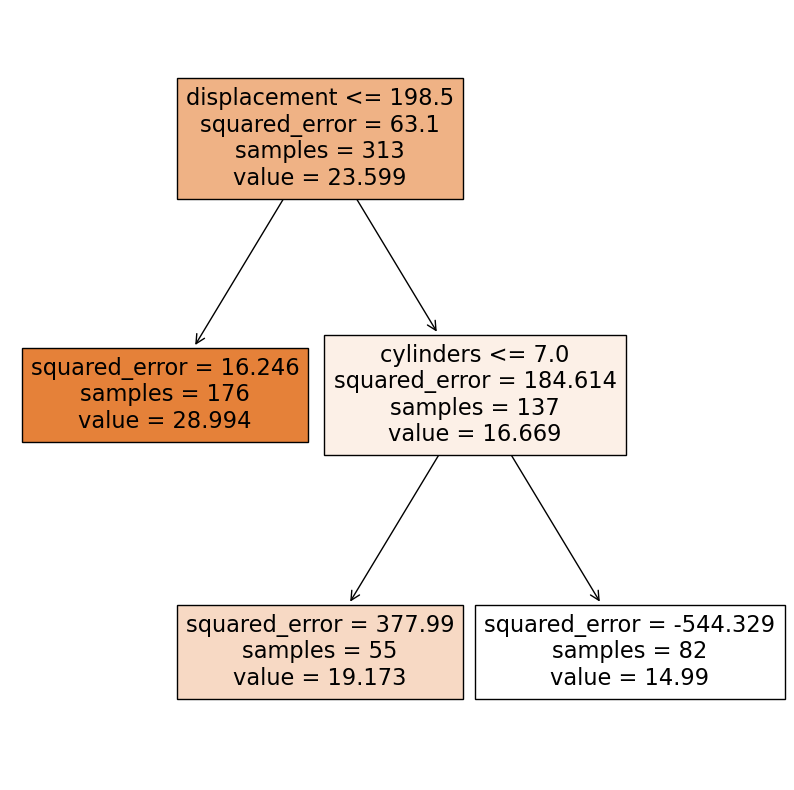

In [11]:
# EXERCICE 7
# INSERT CODE HERE

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_tree(regression_tree, filled=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=['0', '1'])
plt.show()



# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [12]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [13]:
# Exercice 1
# INSERT CODE HERE
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = sns.load_dataset('penguins')

data = data.dropna()

species_encoder = LabelEncoder()
data['species'] = species_encoder.fit_transform(data['species'])

island_encoder = LabelEncoder()
data['island'] = island_encoder.fit_transform(data['island'])

data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,Male
1,0,2,39.5,17.4,186.0,3800.0,Female
2,0,2,40.3,18.0,195.0,3250.0,Female
4,0,2,36.7,19.3,193.0,3450.0,Female
5,0,2,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,Female
340,2,0,46.8,14.3,215.0,4850.0,Female
341,2,0,50.4,15.7,222.0,5750.0,Male
342,2,0,45.2,14.8,212.0,5200.0,Female


# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [14]:
# Exercice 2
# INSERT CODE HERE
from sklearn.model_selection import train_test_split

X = data.drop('sex', axis=1)
y = data['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'apprentissage : ", X_train.shape[0])
print("Taille de l'ensemble de test :", X_test.shape[0])

Taille de l'ensemble d'apprentissage :  266
Taille de l'ensemble de test : 67


# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

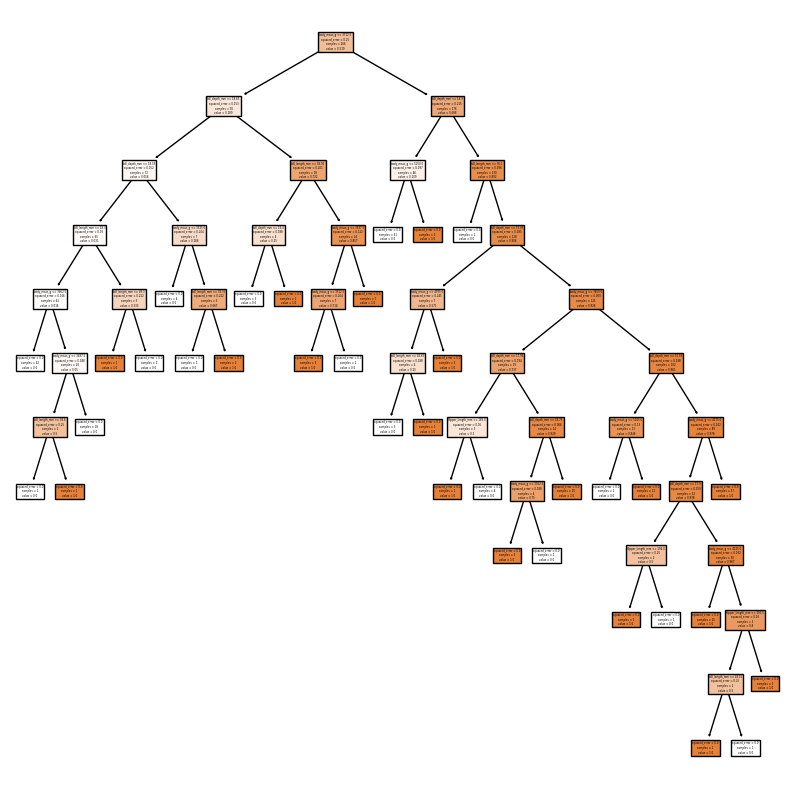

In [15]:
# Exercice 3
# INSERT CODE HERE

from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquer l'encodage à la colonne 'sex' dans les ensembles d'apprentissage et de test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

regression_tree = DecisionTreeRegressor(random_state=42)

regression_tree.fit(X_train, y_train_encoded)

plt.figure(figsize=(10, 10))
plot_tree(regression_tree, filled=True, feature_names=X.columns.tolist())
plt.show()


# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [16]:
# Exercice 4
# INSERT CODE HERE
y_pred = regression_tree.predict(X_test)

print("Prédictions sur l'ensemble de test :", y_pred)

Prédictions sur l'ensemble de test : [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.]


# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [17]:
# Exercice 5
# INSERT CODE HERE
train_score = regression_tree.score(X_train, y_train_encoded)
print("Score sur l'ensemble d'apprentissage :", train_score)

test_score = regression_tree.score(X_test, y_test_encoded)
print("Score sur l'ensemble de test :", test_score)


Score sur l'ensemble d'apprentissage : 1.0
Score sur l'ensemble de test : 0.5171171171171172


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

             Feature  Importance
3      bill_depth_mm    0.481777
5        body_mass_g    0.401737
2     bill_length_mm    0.092392
4  flipper_length_mm    0.024094
0            species    0.000000
1             island    0.000000


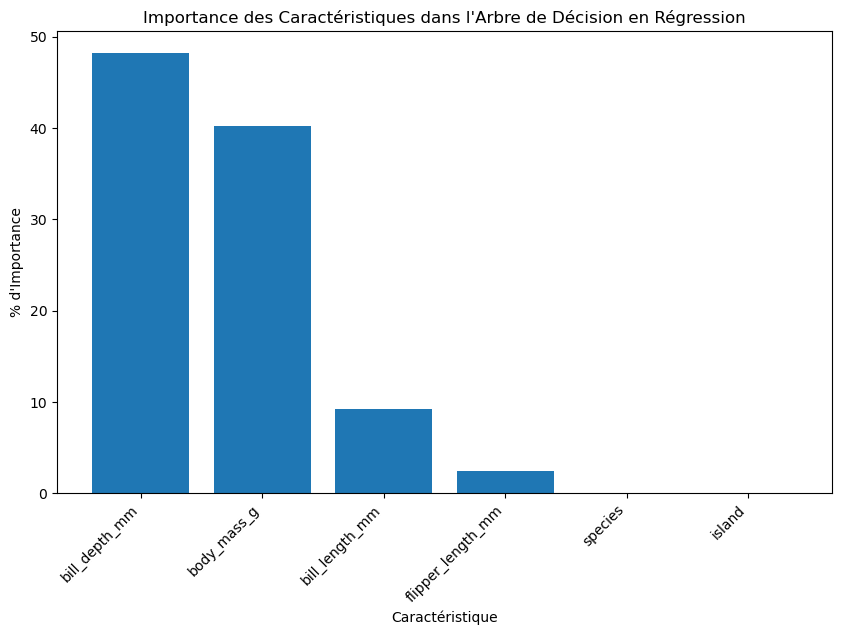

In [18]:
# Exercice 6
# INSERT CODE HERE
feature_importances = regression_tree.feature_importances_

# Créer un DataFrame pour afficher les résultats
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Trier le DataFrame par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance']*100)
plt.xlabel('Caractéristique')
plt.ylabel('% d\'Importance')
plt.title('Importance des Caractéristiques dans l\'Arbre de Décision en Régression')
plt.xticks(rotation=45, ha='right')
plt.show()


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

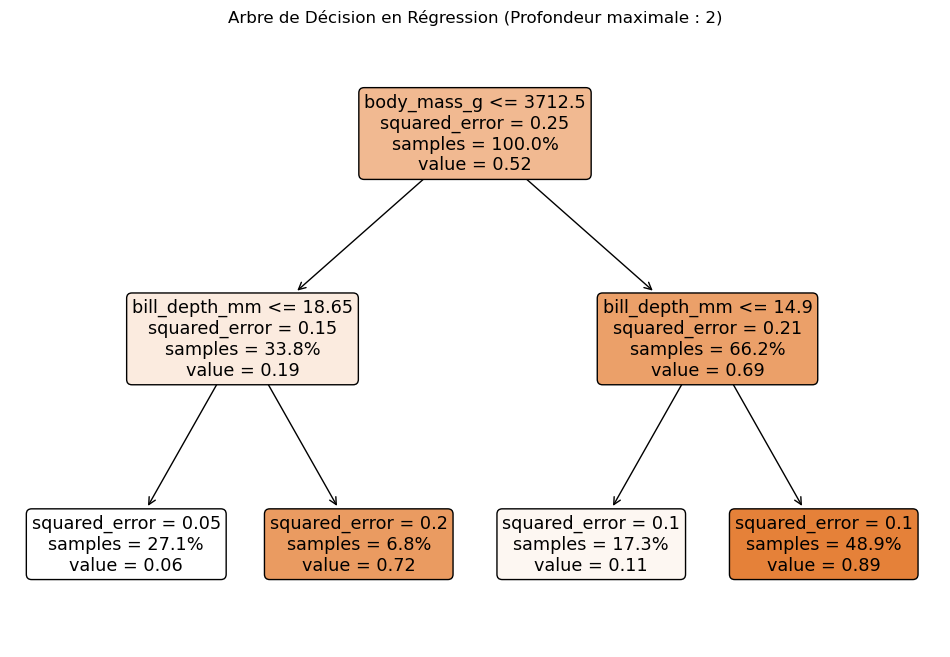

In [19]:
# Exercice 7
# INSERT CODE HERE
from sklearn.tree import plot_tree

regression_tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
regression_tree_depth_2.fit(X_train, y_train_encoded)

plt.figure(figsize=(12, 8))
plot_tree(regression_tree_depth_2, filled=True, feature_names=X.columns.tolist(), rounded=True, proportion=True, precision=2)
plt.title("Arbre de Décision en Régression (Profondeur maximale : 2)")
plt.show()


# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [21]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

list_of_accuracies_train = []
list_of_accuracies_test = []

random_state = 42

# Assurez-vous que X_train et y_train_encoded sont définis correctement avant cette boucle

for i in range(1, 11):
    # Créer le modèle d'arbre de décision en régression avec la profondeur actuelle
    regression_tree = DecisionTreeRegressor(max_depth=i, random_state=random_state)

    # Entraîner le modèle sur l'ensemble d'apprentissage
    regression_tree.fit(X_train, y_train_encoded)

    y_test_pred = regression_tree.predict(X_test)

    train_accuracy = r2_score(y_train_encoded, regression_tree.predict(X_train))
    test_accuracy = r2_score(y_test_encoded, y_test_pred)

    list_of_accuracies_train.append(train_accuracy)
    list_of_accuracies_test.append(test_accuracy)

    print(f"Profondeur maximale : {i}, Précision (Train) : {train_accuracy:.4f}, Précision (Test) : {test_accuracy:.4f}")

print("Liste des précisions (Ensemble d'apprentissage) :", list_of_accuracies_train)
print("Liste des précisions (Ensemble de test) :", list_of_accuracies_test)


Profondeur maximale : 1, Précision (Train) : 0.2229, Précision (Test) : 0.1936
Profondeur maximale : 2, Précision (Train) : 0.6335, Précision (Test) : 0.4116
Profondeur maximale : 3, Précision (Train) : 0.7484, Précision (Test) : 0.4650
Profondeur maximale : 4, Précision (Train) : 0.7923, Précision (Test) : 0.4773
Profondeur maximale : 5, Précision (Train) : 0.8610, Précision (Test) : 0.3942
Profondeur maximale : 6, Précision (Train) : 0.9115, Précision (Test) : 0.2753
Profondeur maximale : 7, Précision (Train) : 0.9605, Précision (Test) : 0.4921
Profondeur maximale : 8, Précision (Train) : 0.9779, Précision (Test) : 0.5054
Profondeur maximale : 9, Précision (Train) : 0.9880, Précision (Test) : 0.5171
Profondeur maximale : 10, Précision (Train) : 0.9925, Précision (Test) : 0.5171
Liste des précisions (Ensemble d'apprentissage) : [0.22294104141505633, 0.6335012979389161, 0.7484216050027871, 0.7923284517445911, 0.8610465064649049, 0.9115150141545476, 0.9604704483695652, 0.977913647342995

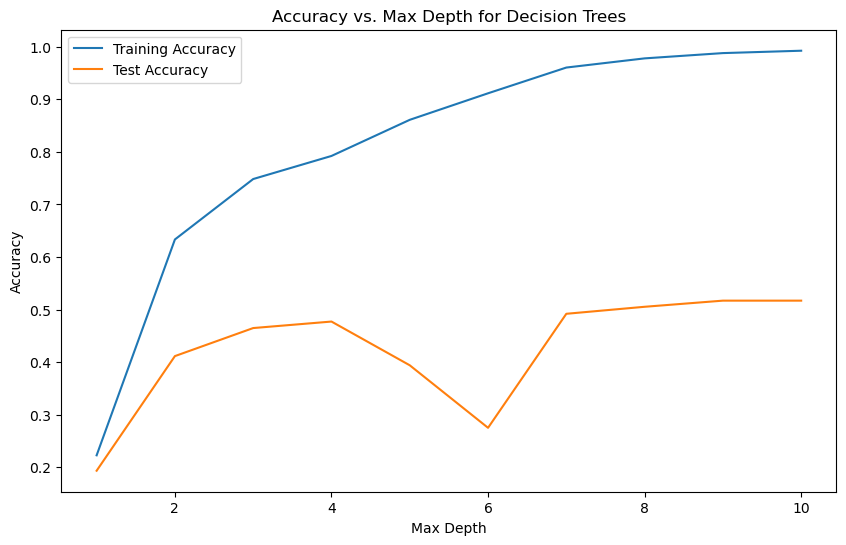

In [22]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), list_of_accuracies_train, label='Training Accuracy')
plt.plot(range(1, 11), list_of_accuracies_test, label='Test Accuracy')
plt.title('Accuracy vs. Max Depth for Decision Trees')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#